In [1]:
import pandas as pd
import numpy as np

mu_vec = pd.read_csv('data/mu_is.csv').values
covariances_mtx = pd.read_csv('data/variances.csv').values

mu_vec = mu_vec.flatten()

# this matrix comes from the lecture on March 29th
M = (np.linalg.inv(covariances_mtx) @ mu_vec)*(1/(mu_vec.T @ np.linalg.inv(covariances_mtx) @ mu_vec))

In [2]:
def expected_return(x_vec, mu_vec):
    return np.dot(x_vec, mu_vec)

def variance(x_vec, covariances_mtx):
    return np.dot(x_vec, np.dot(covariances_mtx, x_vec))

In [3]:
# NOTE: mu0 is the expected weekly return of the portfolio
mu0 = 1

x_star = M*mu0

x_star, expected_return(x_star, mu_vec), variance(x_star, covariances_mtx)

(array([  0.99914057, -33.43901254,   0.80384896, -11.81209288,
         13.9751875 ,   7.65052186,   3.26221268,   0.4608787 ,
         -2.12938836,  -2.00976805,  -3.93450325]),
 1.0,
 0.27684158927112945)

Text(0, 0.5, 'weekly variance (for given expected return)')

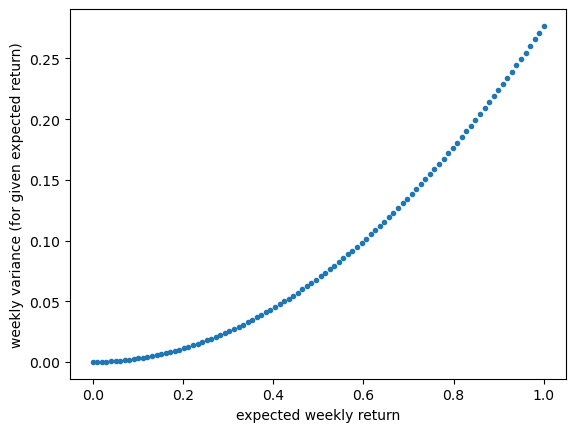

In [4]:
import matplotlib.pyplot as plt

mu0 = np.linspace(0, 1, 100)
variances = [variance(M*mu0_, covariances_mtx) for mu0_ in mu0]

plt.plot(mu0, variances, '.')
plt.xlabel('expected weekly return')
plt.ylabel('weekly variance (for given expected return)')